# Boletim Epidemiológico + Google Mobility

Este Notebook busca analisar os dados de dois DataSets: Boletim Epidemiológico do Brasil.io com o Google Mobility transformados por `transform_boletim-mobile.ipynb`.

In [6]:
# Carregar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set_theme(style="darkgrid")
plt.style.use('bmh')
%matplotlib inline

In [7]:
#df_cidade = pd.read_pickle('./dataframes/df_mob_cidade.pkl')
# Carregar o DF com coluna do PCA
df_cidade = pd.read_pickle('./dataframes/df_mob_cidade_pca.pkl')
# Retira dias antes do lockdown
df_cidade = df_cidade[df_cidade.index > "2020-03-30"]
df_casos = pd.read_pickle('./dataframes/df_casos_cidade.plk')
# Retira dias antes do lockdown
df_casos = df_casos[df_casos.index > "2020-03-30"]

In [8]:
df = df_casos.join(df_cidade)
df.columns

Index(['city', 'city_ibge_code', 'epidemiological_week',
       'estimated_population', 'estimated_population_2019', 'is_last',
       'is_repeated', 'last_available_confirmed',
       'last_available_confirmed_per_100k_inhabitants', 'last_available_date',
       'last_available_death_rate', 'last_available_deaths', 'order_for_place',
       'place_type', 'state', 'new_confirmed', 'new_deaths',
       'Retail_Recriation', 'Grocery_Pharmacy', 'Parks', 'Transit',
       'Workplaces', 'Residential', 'component_1'],
      dtype='object')

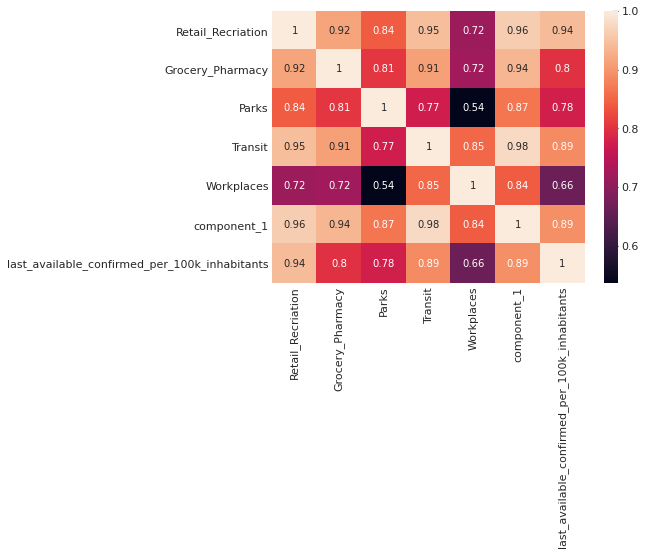

In [9]:
features = ['Retail_Recriation','Grocery_Pharmacy','Parks','Transit','Workplaces','component_1','last_available_confirmed_per_100k_inhabitants']
x = df.loc[:, features]

df_corr = x.corr()
fig, ax = plt.subplots(figsize=(7, 5))

hm = sns.heatmap(df_corr, ax = ax, annot=True)

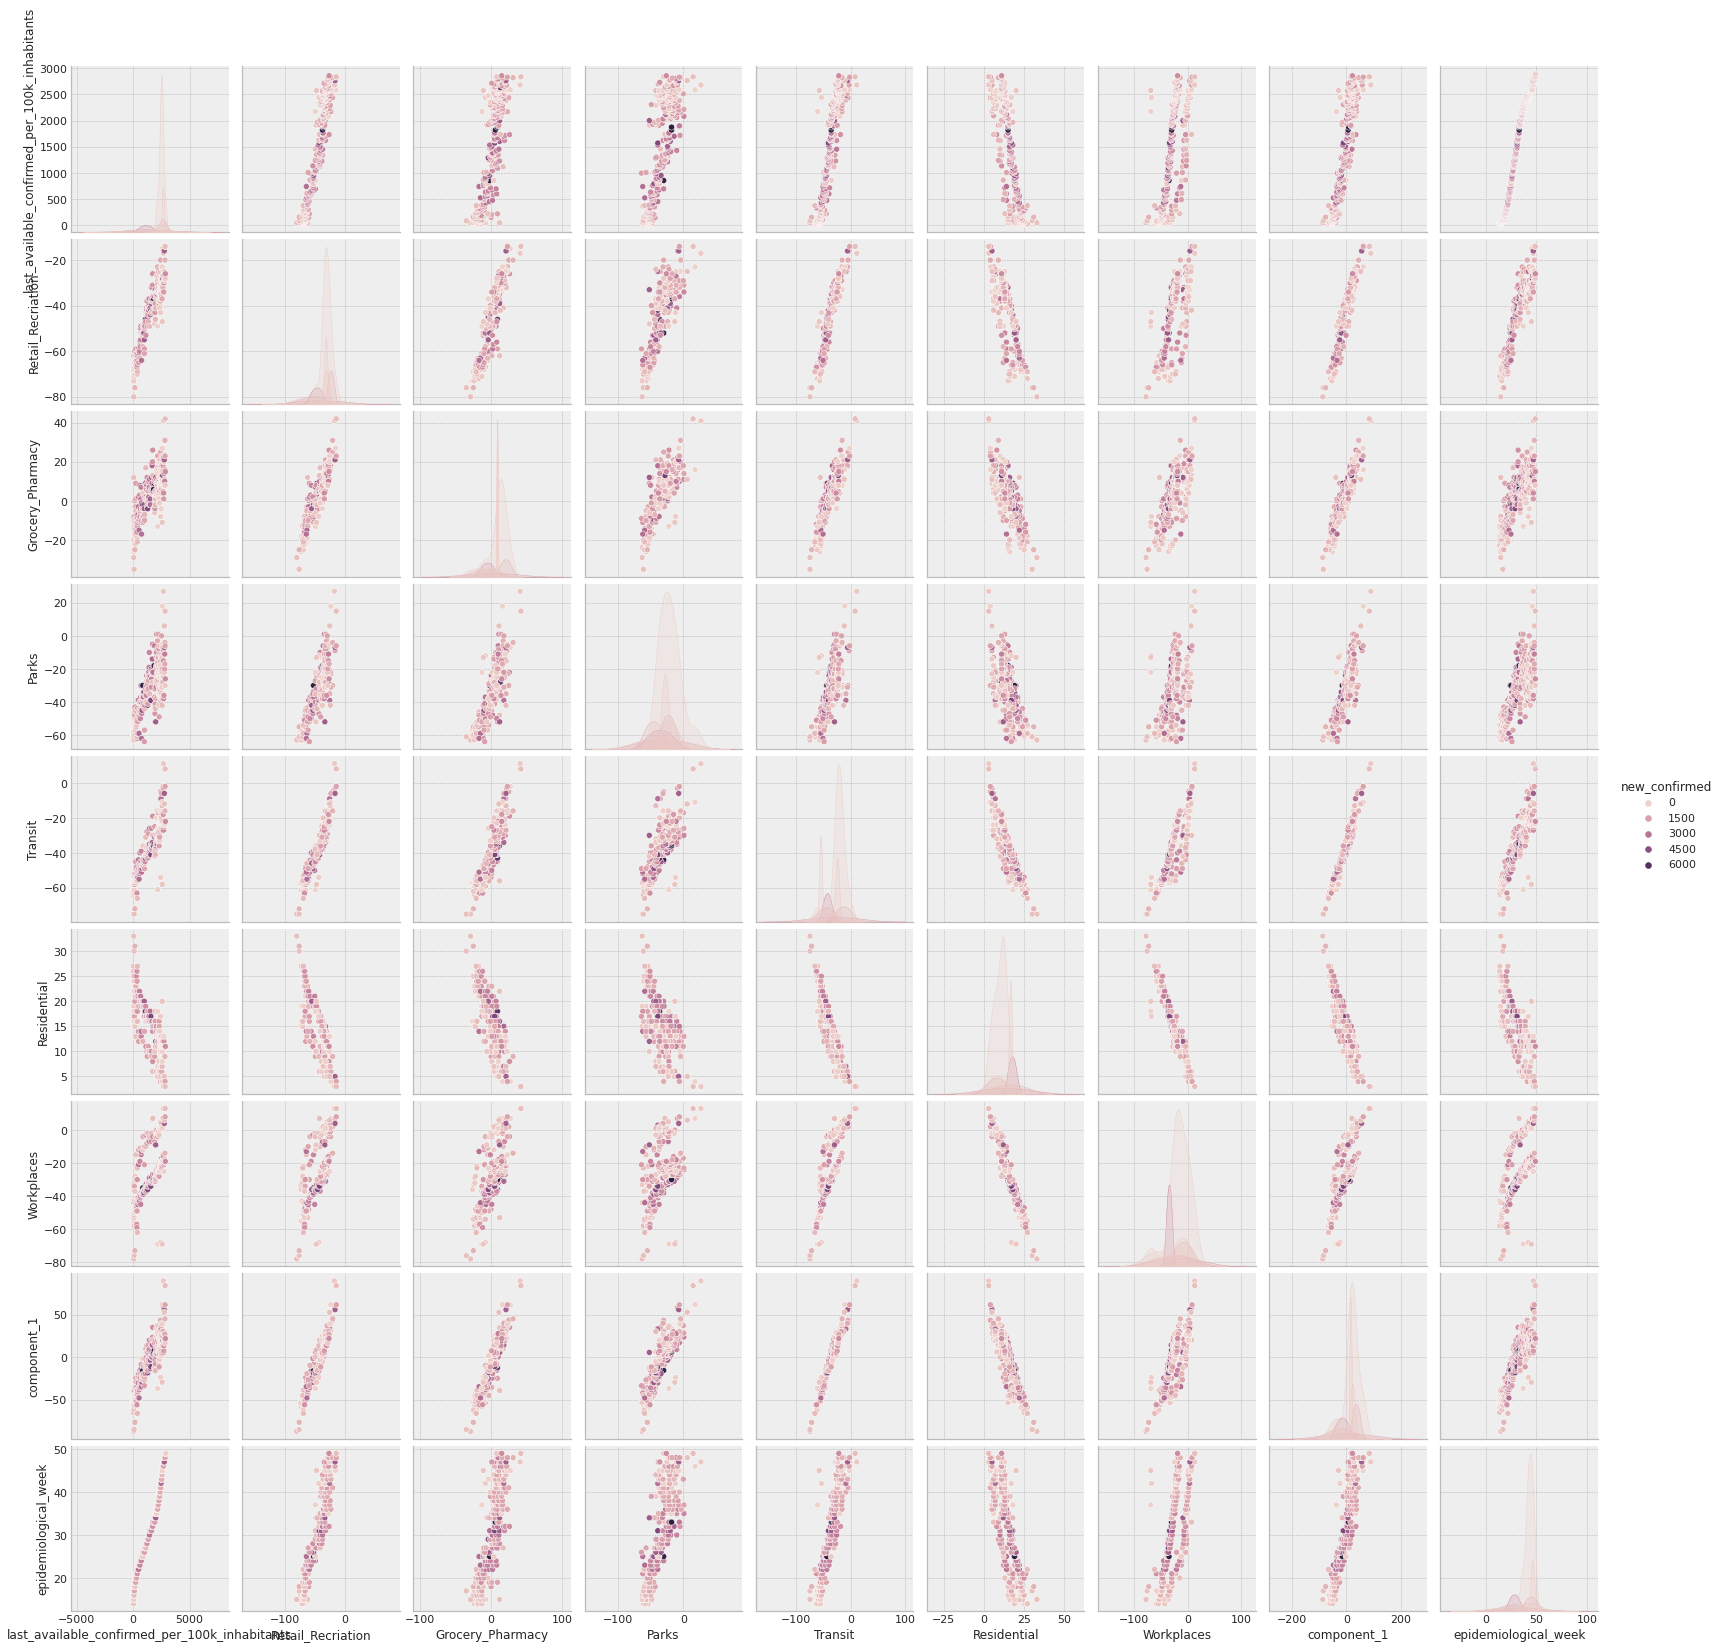

In [12]:
sns.pairplot(df[['last_available_confirmed_per_100k_inhabitants',
                 'new_confirmed',
                 'Retail_Recriation',
                 'Grocery_Pharmacy',
                 'Parks',
                 'Transit',
                 'Residential',
                 'Workplaces',
                 'component_1',
                 'epidemiological_week']].groupby('date').mean(), hue='new_confirmed')

In [14]:
fig = plt.subplots(figsize=(18, 10))
#sns.scatterplot(x='last_available_confirmed', y='component_1', hue='epidemiological_week', data=df)
sns.scatterplot(x='date', y='component_1', hue='new_confirmed', data=df)

<AxesSubplot:xlabel='date', ylabel='component_1'>

In [18]:
from statsmodels.formula.api import ols

# Explicar last_available_confirmed por todas as outras features
model = ols("last_available_confirmed_per_100k_inhabitants ~ Residential + Retail_Recriation + Grocery_Pharmacy + Parks + Workplaces + Transit", data=df)

response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          OLS Regression Results                                         
=========================================================================================================
Dep. Variable:     last_available_confirmed_per_100k_inhabitants   R-squared:                       0.925
Model:                                                       OLS   Adj. R-squared:                  0.923
Method:                                            Least Squares   F-statistic:                     493.5
Date:                                           Sat, 12 Dec 2020   Prob (F-statistic):          1.41e-131
Time:                                                   14:13:15   Log-Likelihood:                -1717.7
No. Observations:                                            246   AIC:                             3449.
Df Residuals:                                                239   BIC:                             3474.
Df Model:                                                      6                                         
Covariance Type:                                       nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5294.0038    132.267     40.025      0.000    5033.445    5554.563
Residential         -55.1738     12.563     -4.392      0.000     -79.923     -30.425
Retail_Recriation    65.4016      4.617     14.166      0.000      56.307      74.496
Grocery_Pharmacy    -28.7670      3.461     -8.313      0.000     -35.584     -21.950
Parks                -2.1069      1.934     -1.090      0.277      -5.916       1.702
Workplaces          -16.3968      3.773     -4.346      0.000     -23.829      -8.964
Transit              13.8856      5.285      2.627      0.009       3.474      24.298
==============================================================================
Omnibus:                        2.303   Durbin-Watson:                   1.456
Prob(Omnibus):                  0.316   Jarque-Bera (JB):                1.969
Skew:                           0.101   Prob(JB):                        0.374
Kurtosis:                       2.611   Cond. No.                         634.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Perguntas:

- Será que se adiantar o número de mortes em ~14 dias, a relação entre os dados de mobilidade firarão mais evidentes?
- Será que se transformar o número de mortes/casos em uma variável discreta (e.g. baixo, médio e alto) as relações ficarão mais evidentes?
- Colocar os dados do google mobility dividido em semanas e avaliar com os dados da semana epidemiológica.
- Os dados do component_1 criado no PCA é o bastante para descrever a mobilidade da cidade?

In [8]:
df.head()

city  city_ibge_code  epidemiological_week  \
date                                                          
2020-02-25  São Paulo       3550308.0                     9   
2020-02-26  São Paulo       3550308.0                     9   
2020-02-27  São Paulo       3550308.0                     9   
2020-02-28  São Paulo       3550308.0                     9   
2020-02-29  São Paulo       3550308.0                     9   

            estimated_population  estimated_population_2019  is_last  \
date                                                                   
2020-02-25            12325232.0                 12252023.0    False   
2020-02-26            12325232.0                 12252023.0    False   
2020-02-27            12325232.0                 12252023.0    False   
2020-02-28            12325232.0                 12252023.0    False   
2020-02-29            12325232.0                 12252023.0    False   

            is_repeated  last_available_confirmed  \
date                                                
2020-02-25        False                         1   
2020-02-26        False                         1   
2020-02-27        False                         1   
2020-02-28        False                         2   
2020-02-29        False                         2   

            last_available_confirmed_per_100k_inhabitants last_available_date  \
date                                                                            
2020-02-25                                        0.00811          2020-02-25   
2020-02-26                                        0.00811          2020-02-26   
2020-02-27                                        0.00811          2020-02-27   
2020-02-28                                        0.01623          2020-02-28   
2020-02-29                                        0.01623          2020-02-29   

            ...  state  new_confirmed  new_deaths Retail_Recriation  \
date        ...                                                       
2020-02-25  ...     SP              1           0             -47.0   
2020-02-26  ...     SP              0           0             -22.0   
2020-02-27  ...     SP              0           0               0.0   
2020-02-28  ...     SP              1           0               2.0   
2020-02-29  ...     SP              0           0               4.0   

           Grocery_Pharmacy  Parks  Transit  Workplaces  Residential  \
date                                                                   
2020-02-25            -30.0  -39.0    -51.0       -69.0         13.0   
2020-02-26             -6.0  -31.0    -14.0       -15.0          6.0   
2020-02-27              6.0   17.0     12.0        16.0         -2.0   
2020-02-28              6.0   12.0     15.0        21.0         -2.0   
2020-02-29             11.0   11.0      8.0         6.0          2.0   

            component_1  
date                     
2020-02-25    -2.817674  
2020-02-26     0.617155  
2020-02-27     3.820415  
2020-02-28     3.942804  
2020-02-29     3.574554  

[5 rows x 24 columns]